<a href="https://colab.research.google.com/github/SarveshVeginwar/Macine_learning/blob/main/ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('house_cleaned.csv')

In [4]:
data.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [14]:
for column in ['area', 'bedRoom', 'agePossession', 'price_per_sqft']:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric, errors become NaN
    data[column] = data[column].fillna(data[column].mean())  # Fill NaN with the mean of the column

In [19]:
data.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,NaN,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,NaN,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,NaN,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,NaN,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,NaN,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [15]:
X = data[['area', 'bedRoom', 'agePossession']]
y = data['price_per_sqft']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X = X.dropna()
y = y[X.index]

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['agePossession']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['agePossession']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression()

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv('house_cleaned.csv')

In [25]:
data.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv('house_cleaned.csv')

missing_values = data[['area', 'bedRoom', 'bathroom', 'price_per_sqft']].isnull().sum()
print("Missing values in selected columns:")
print(missing_values)

imputer = SimpleImputer(strategy='mean')
X = data[['area', 'bedRoom', 'bathroom']]
y = data['price_per_sqft']

X_imputed = imputer.fit_transform(X)

y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y_imputed = y_imputed.ravel()

print("Missing values after imputation:")
print(pd.DataFrame(X_imputed).isnull().sum())
print(pd.Series(y_imputed).isnull().sum())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')


Missing values in selected columns:
area              19
bedRoom            0
bathroom           0
price_per_sqft    19
dtype: int64
Missing values after imputation:
0    0
1    0
2    0
dtype: int64
0
Mean Absolute Error (MAE): 18676.439839050203
Mean Squared Error (MSE): 1786711151.4260223
Root Mean Squared Error (RMSE): 42269.50616491778
R-squared Score: 0.046483497545275254


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

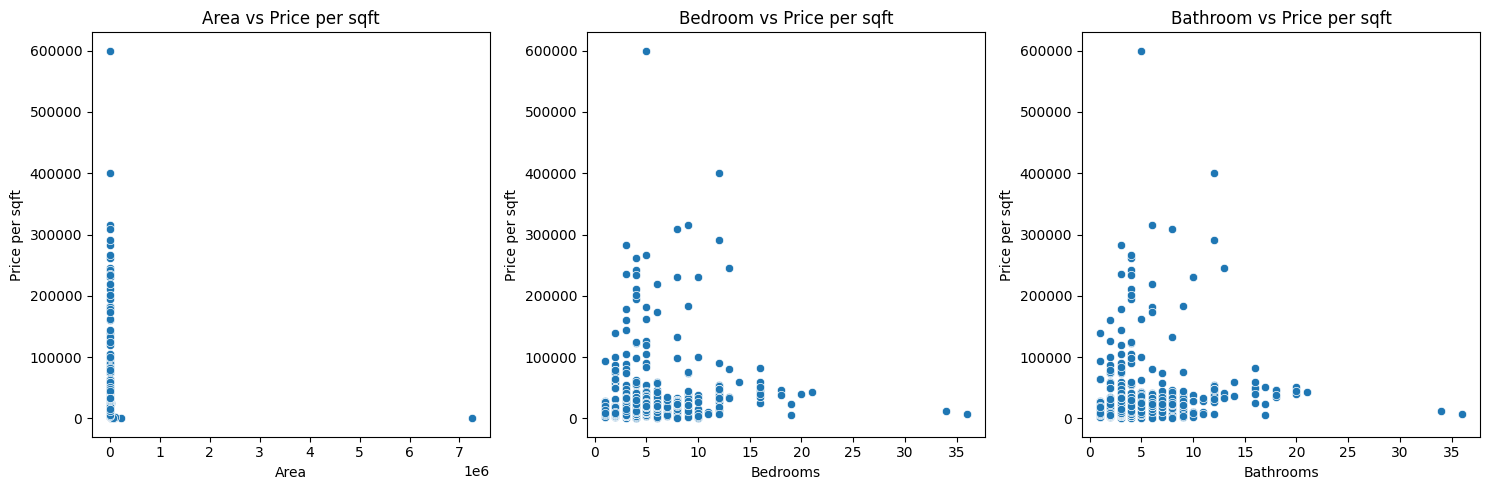

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=data['area'], y=data['price_per_sqft'])
plt.title('Area vs Price per sqft')
plt.xlabel('Area')
plt.ylabel('Price per sqft')

plt.subplot(1, 3, 2)
sns.scatterplot(x=data['bedRoom'], y=data['price_per_sqft'])
plt.title('Bedroom vs Price per sqft')
plt.xlabel('Bedrooms')
plt.ylabel('Price per sqft')

plt.subplot(1, 3, 3)
sns.scatterplot(x=data['bathroom'], y=data['price_per_sqft'])
plt.title('Bathroom vs Price per sqft')
plt.xlabel('Bathrooms')
plt.ylabel('Price per sqft')

plt.tight_layout()
plt.show()


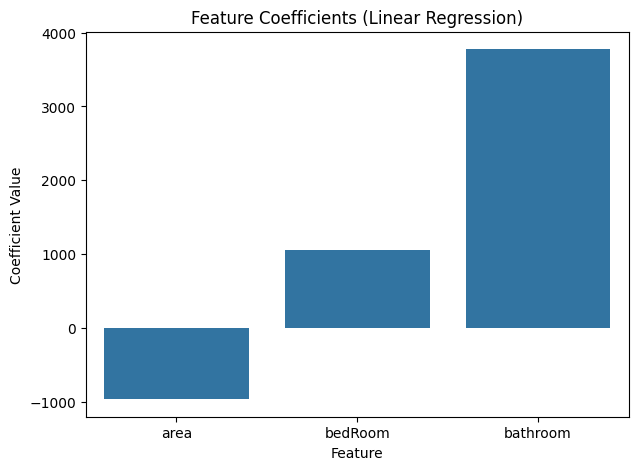

In [40]:
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(7, 5))
sns.barplot(x=features, y=coefficients)
plt.title('Feature Coefficients (Linear Regression)')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()